<a href="https://colab.research.google.com/github/KARTHIK01122004/dv_task/blob/main/task9_dv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

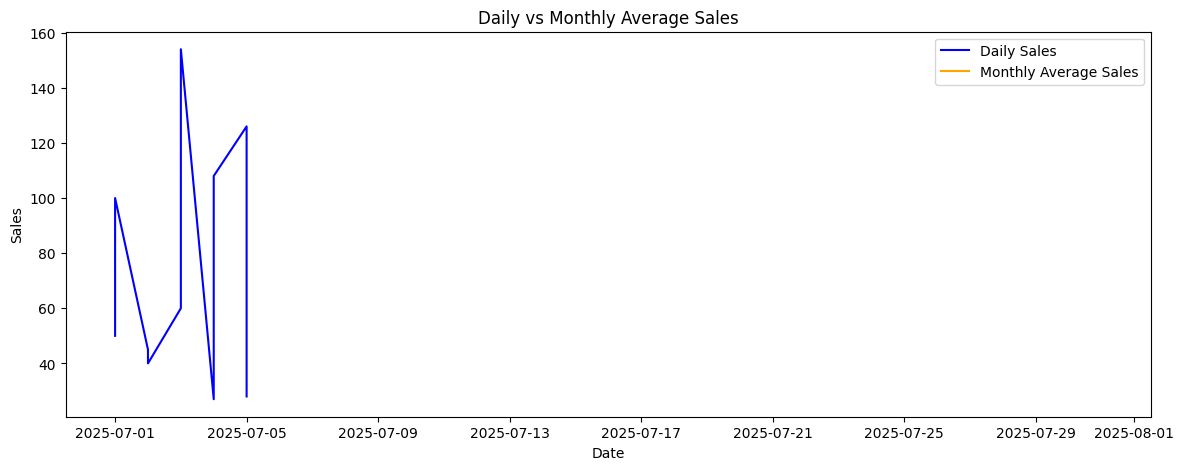

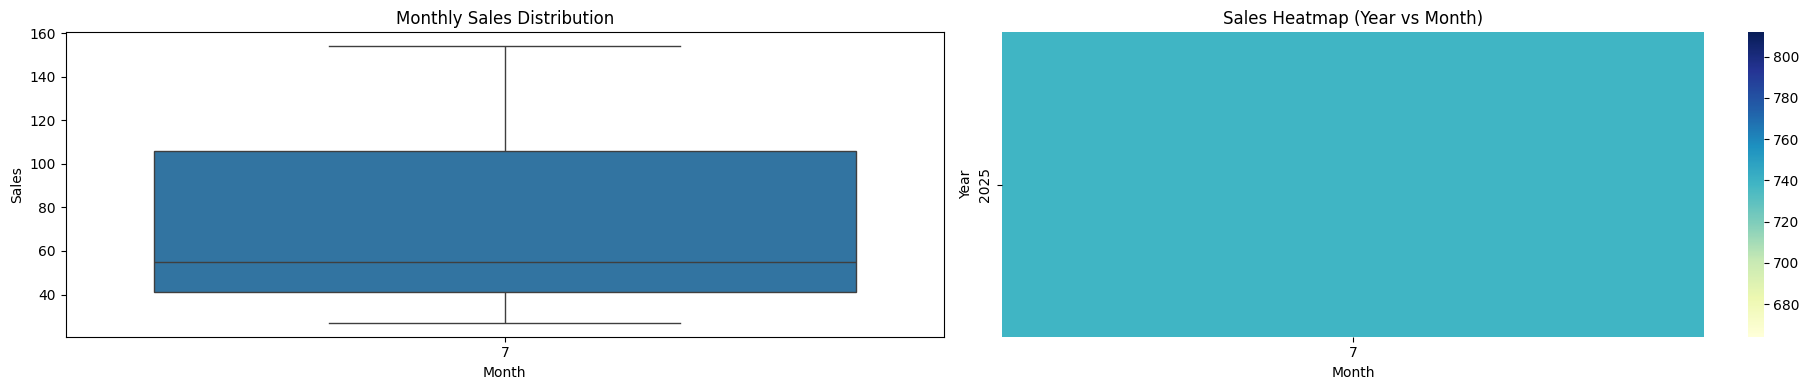

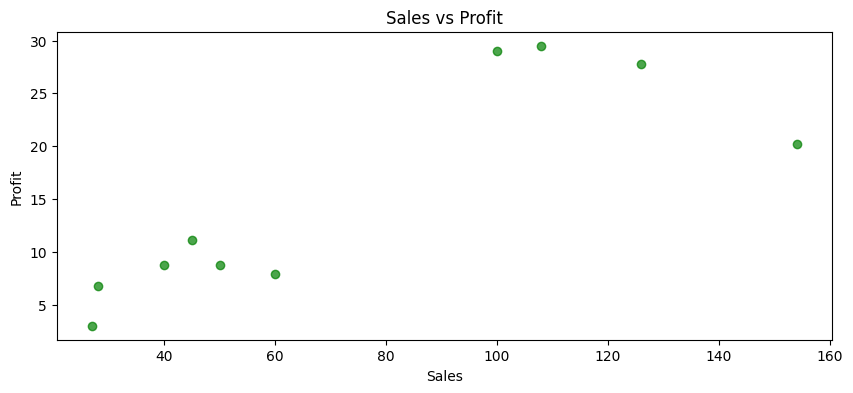

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("sales_data_full.csv")

# Ensure 'Date' column is datetime and set it as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Calculate 'Sales' column
df['Sales'] = df['Quantity'] * df['Price']

# Plot daily and monthly sales
plt.figure(figsize=(14, 5))
plt.plot(df.index, df['Sales'], label='Daily Sales', color='blue')

monthly = df['Sales'].resample('M').mean()
plt.plot(monthly.index, monthly, label='Monthly Average Sales', color='orange')

plt.title("Daily vs Monthly Average Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

# Compute monthly and yearly aggregates
monthly_sum = df['Sales'].resample('M').sum()
yearly_sum = df['Sales'].resample('Y').sum()

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(19, 4))

# Add 'month' and 'year' columns for boxplot and heatmap
df['Month'] = df.index.month
df['Year'] = df.index.year

# Boxplot for monthly sales distribution
sns.boxplot(x="Month", y="Sales", data=df, ax=ax[0])
ax[0].set_title("Monthly Sales Distribution")

# Heatmap: Year vs Month
pivot = df.pivot_table(values='Sales', index='Year', columns='Month', aggfunc='sum')
sns.heatmap(pivot, cmap='YlGnBu', ax=ax[1])
ax[1].set_title("Sales Heatmap (Year vs Month)")

plt.tight_layout()
plt.show()

# Add profit column if missing
if 'Profit' not in df.columns:
    np.random.seed(42)
    df['Profit'] = df['Sales'] * np.random.uniform(0.1, 0.3, size=len(df))

# Calculate profit margin
df['Profit Margin'] = df['Profit'] / df['Sales']

# Plot Sales vs Profit
plt.figure(figsize=(10, 4))
plt.scatter(df['Sales'], df['Profit'], alpha=0.7, color='green')
plt.title("Sales vs Profit")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.show()

First 5 rows of dataset:
         Date Region   Product  Quantity  Price
0  2025-07-01  South       Pen        10      5
1  2025-07-01  North  Notebook         5     20
2  2025-07-02  South    Pencil        15      3
3  2025-07-02   East    Eraser        20      2
4  2025-07-03   West       Pen        12      5


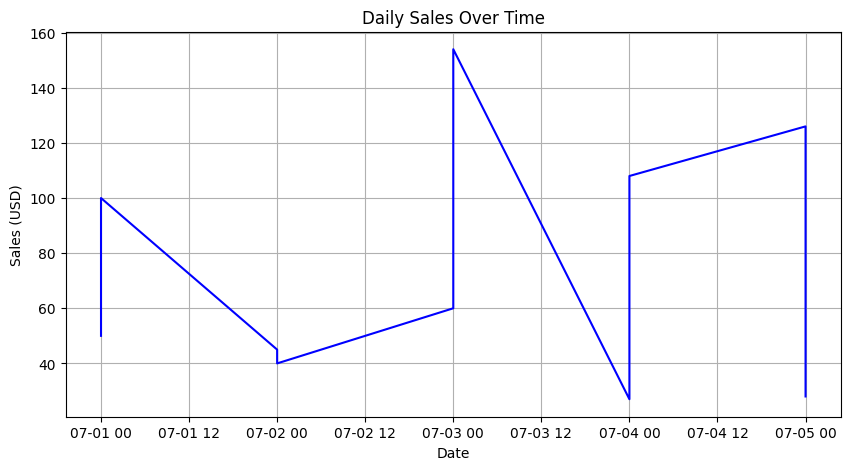

/tmp/ipython-input-434781948.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sales_data, x="year", y="Sales", palette="Set2")


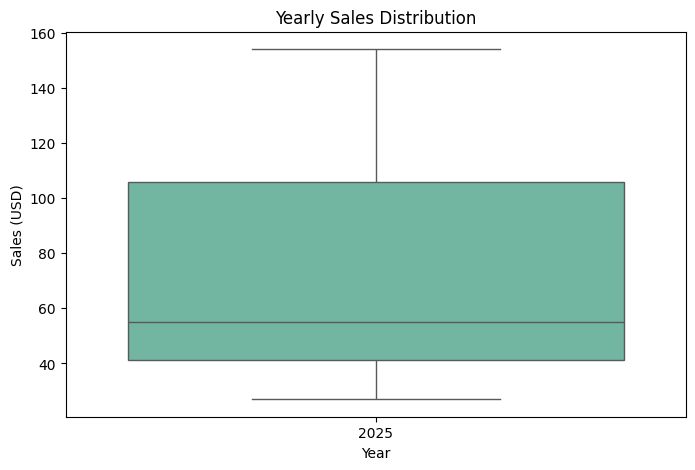

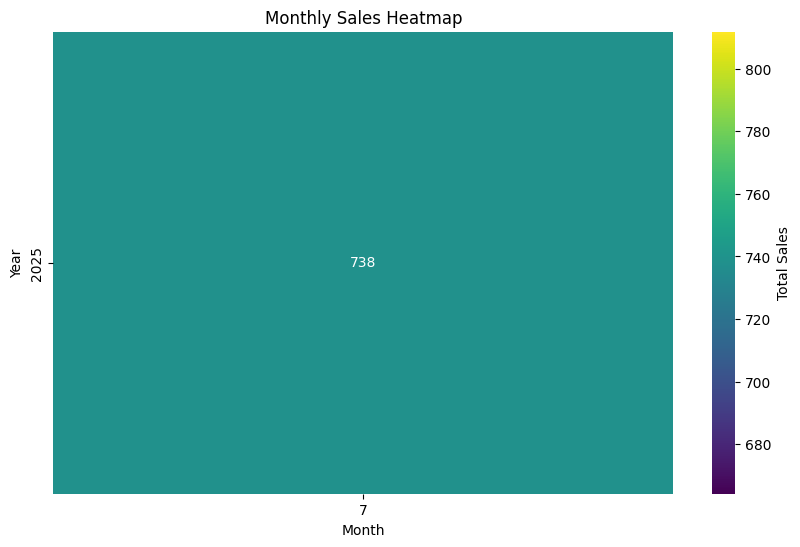

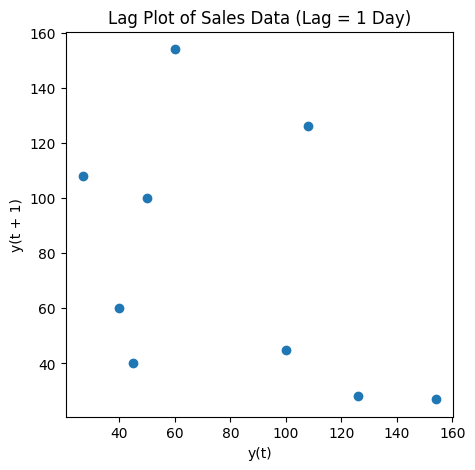

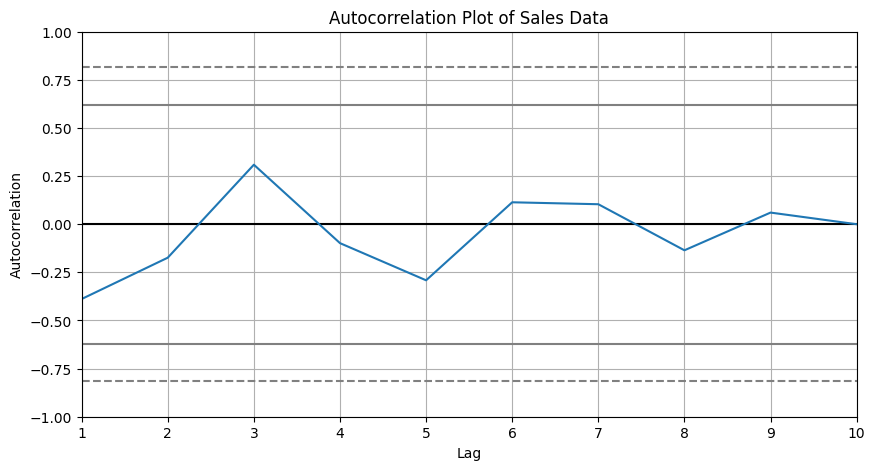


✅ Visualization Summary:
1️⃣ Line Plot: Shows overall sales trend and seasonality.
2️⃣ Box Plot: Shows sales distribution for each year.
3️⃣ Heatmap: Highlights monthly total sales across years.
4️⃣ Lag Plot: Reveals correlation between consecutive days.
5️⃣ Autocorrelation Plot: Indicates periodic patterns (seasonality).


In [5]:
# ---------------------------------------------------------------
# TIME SERIES ANALYSIS AND VISUALIZATION OF SALES DATA
# ---------------------------------------------------------------

# Step 1: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import lag_plot, autocorrelation_plot

# Step 2: Load dataset
sales_data = pd.read_csv("sales_data_full.csv")   # Replace with your file path

# Step 3: Display first few rows
print("First 5 rows of dataset:")
print(sales_data.head())

# Step 4: Data preprocessing
# Convert 'date' column to datetime type
sales_data["Date"] = pd.to_datetime(sales_data["Date"])

# Set date as index
sales_data.set_index("Date", inplace=True)

# Calculate 'Sales' column
sales_data['Sales'] = sales_data['Quantity'] * sales_data['Price']


# ---------------------------------------------------------------
# Step 5: LINE PLOT - Sales over time
# ---------------------------------------------------------------
plt.figure(figsize=(10, 5))
plt.plot(sales_data.index, sales_data["Sales"], color='blue')
plt.title("Daily Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales (USD)")
plt.grid(True)
plt.show()

# ---------------------------------------------------------------
# Step 6: BOX PLOT - Yearly sales distribution
# ---------------------------------------------------------------
sales_data["year"] = sales_data.index.year

plt.figure(figsize=(8, 5))
sns.boxplot(data=sales_data, x="year", y="Sales", palette="Set2")
plt.title("Yearly Sales Distribution")
plt.xlabel("Year")
plt.ylabel("Sales (USD)")
plt.show()

# ---------------------------------------------------------------
# Step 7: HEATMAP - Monthly total sales per year
# ---------------------------------------------------------------
sales_data["month"] = sales_data.index.month

# Group data by year and month
sales = sales_data.groupby(["year", "month"]).sum(numeric_only=True)

# Pivot table for heatmap
sales_matrix = sales.reset_index().pivot(index="year", columns="month", values="Sales")

plt.figure(figsize=(10, 6))
sns.heatmap(sales_matrix, cmap="viridis", cbar_kws={"label": "Total Sales"}, annot=True, fmt=".0f")
plt.title("Monthly Sales Heatmap")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()

# ---------------------------------------------------------------
# Step 8: LAG PLOT - Relationship between consecutive sales
# ---------------------------------------------------------------
plt.figure(figsize=(5, 5))
lag_plot(sales_data["Sales"])
plt.title("Lag Plot of Sales Data (Lag = 1 Day)")
plt.show()

# ---------------------------------------------------------------
# Step 9: AUTOCORRELATION PLOT - Correlation over time lags
# ---------------------------------------------------------------
plt.figure(figsize=(10, 5))
autocorrelation_plot(sales_data["Sales"])
plt.title("Autocorrelation Plot of Sales Data")
plt.show()

# ---------------------------------------------------------------
# Step 10: Summary interpretation
# ---------------------------------------------------------------
print("\n✅ Visualization Summary:")
print("1️⃣ Line Plot: Shows overall sales trend and seasonality.")
print("2️⃣ Box Plot: Shows sales distribution for each year.")
print("3️⃣ Heatmap: Highlights monthly total sales across years.")
print("4️⃣ Lag Plot: Reveals correlation between consecutive days.")
print("5️⃣ Autocorrelation Plot: Indicates periodic patterns (seasonality).")